In [47]:
# Add magic line
%matplotlib inline 

In [48]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

In [49]:
# 1. Import Data into pandas df
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [50]:
# Read the city data and store in df
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [51]:
# Read the ride data and store in df
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [52]:
# 2. Merge DataFrames
# Prepare data to be merged
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [53]:
# Get the columns and rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [54]:
# Get unique values for each city type
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [55]:
# Find number of occurences for each city type
sum(city_data_df["type"]=="Rural")

18

In [56]:
# Get info about data to determine cleanup
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [57]:
# Merge the DataFrames by the city
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Inspect new df
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [58]:
# 3. Create bubble chart for avg fare vs # of rides where bubble s = # drivers by city
# Create dataframe for each type of city

In [59]:
# Create Urban city df
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [60]:
# Create Suburban city df
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [61]:
# Create Rural city df
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [62]:
# Get count of rides for each city type
urban_ride_count = urban_cities_df.groupby(["city"]).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [63]:
# Get average fare for each city in each city type
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [64]:
# Get average number of drivers for each city
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

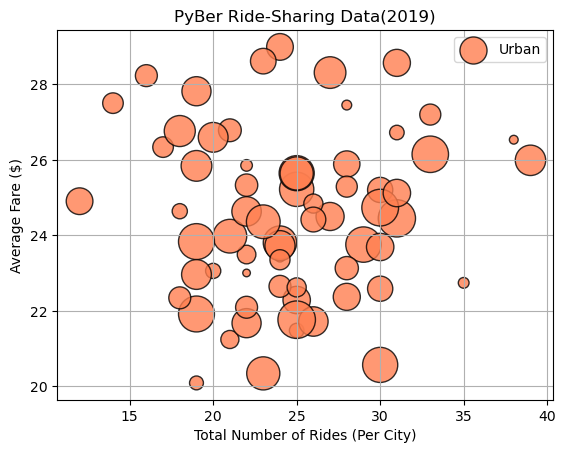

In [65]:
# Build scatter plot for urban city type
plt.scatter(urban_ride_count, 
        urban_avg_fare,
        s=10*urban_driver_count,
        ec='black',
        linewidths=1,
        c='coral',
        alpha=.8,
        label='Urban')
plt.title('PyBer Ride-Sharing Data(2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
# Add the legend
plt.legend()

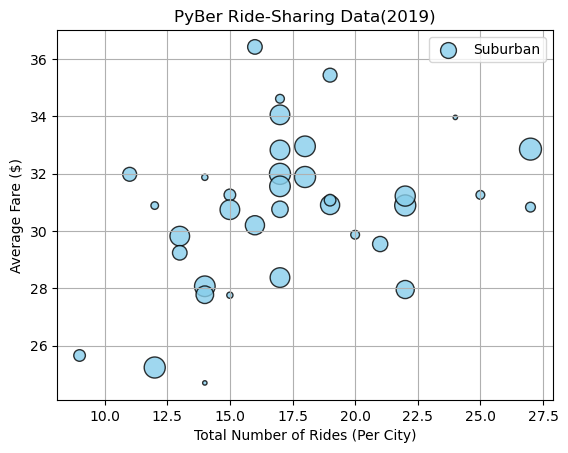

In [66]:
# Build scatter plot for suburban city type
plt.scatter(suburban_ride_count, 
        suburban_avg_fare,
        s=10*suburban_driver_count,
        ec='black',
        linewidths=1,
        c='skyblue',
        alpha=.8,
        label='Suburban')
plt.title('PyBer Ride-Sharing Data(2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
# Add the legend
plt.legend()

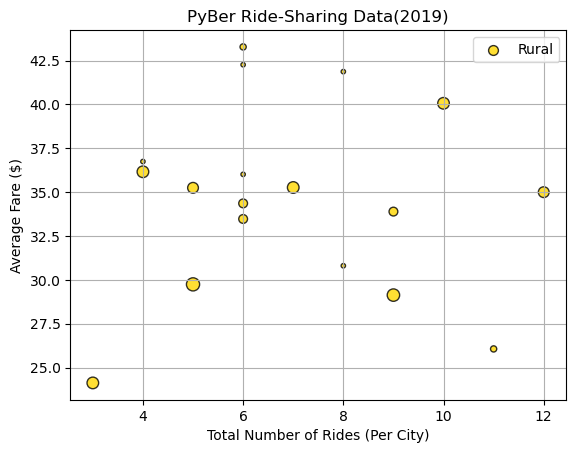

In [67]:
# Build scatter plot for suburban city type
plt.scatter(rural_ride_count, 
        rural_avg_fare,
        s=10*rural_driver_count,
        ec='black',
        linewidths=1,
        c='gold',
        alpha=.8,
        label='Rural')
plt.title('PyBer Ride-Sharing Data(2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
# Add the legend
plt.legend()

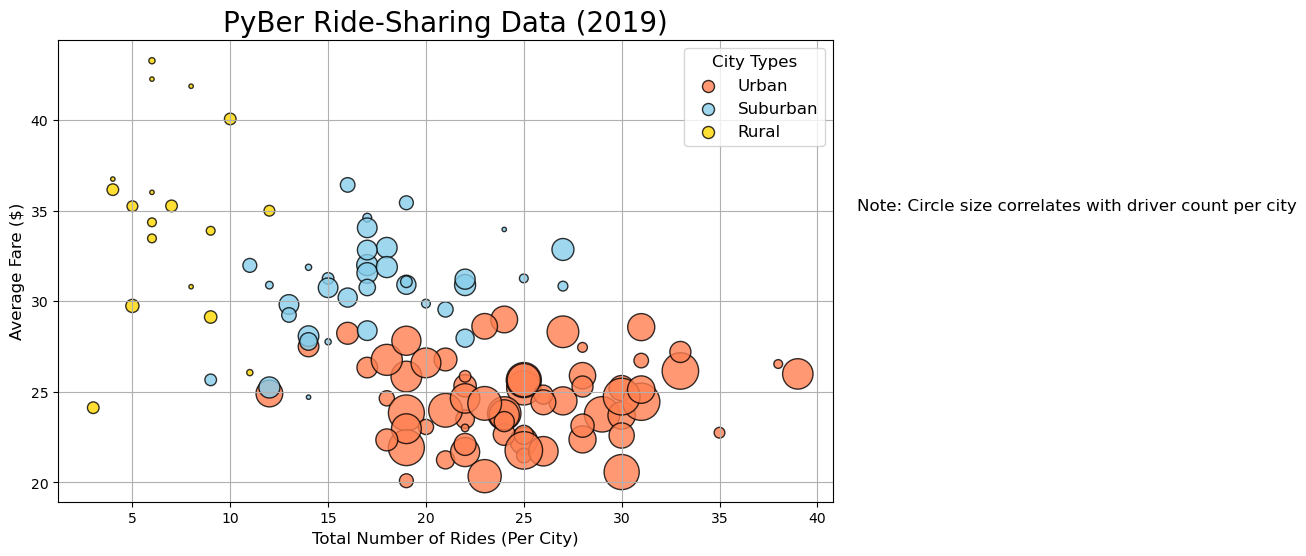

In [68]:
# Combine scatter plots to be displayed on 1 chart
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
        urban_avg_fare,
        s=10*urban_driver_count,
        ec='black',
        linewidths=1,
        c='coral',
        alpha=.8,
        label='Urban')

plt.scatter(suburban_ride_count, 
        suburban_avg_fare,
        s=10*suburban_driver_count,
        ec='black',
        linewidths=1,
        c='skyblue',
        alpha=.8,
        label='Suburban')

plt.scatter(rural_ride_count, 
        rural_avg_fare,
        s=10*rural_driver_count,
        ec='black',
        linewidths=1,
        c='gold',
        alpha=.8,
        label='Rural')

# Add formatting to all plots
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize='12', mode='Expanded',
        scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add note about bubble size
plt.text(42, 35, "Note: Circle size correlates with driver count per city", fontsize='12')

# Save the image
plt.savefig('analysis/fig1.png')

# Show the plot
plt.show()

In [69]:
# Statistical info (mean, median, mode) for number of rides for each city type
# Get summary statistics for urban city type
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [70]:
# Get summary statistics for suburban city type
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [71]:
# Get summary statistics for rural city type
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [72]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [73]:
# Calculate the median of the ride count for each city type
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [74]:
# Calculate the mode of the ride count for each city type
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [75]:
# Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [76]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_rural_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [77]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [78]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [79]:
# 4. Statistical info for avg fares for each city type
# Get the fares for the urban cities
urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [80]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [82]:
# Get the fares for the suburban cities
suburban_fares = suburban_cities_df['fare']
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [83]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [84]:
# Get the fares for the rural cities
rural_fares = rural_cities_df['fare']
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [85]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [123]:
# 5. Statistical info for number of drivers for each city type
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

1625

In [89]:
# Calculate the measures of central tendency for the average driver count for the urban cities.
mean_urban_driver_count = np.mean(urban_driver_count)
print(f"The mean driver count for urban cities are {mean_urban_driver_count:.2f}.")

median_urban_driver_count = np.median(urban_driver_count)
print(f"The median driver count for urban cities are {median_urban_driver_count:.2f}.")

mode_urban_driver_count = sts.mode(urban_driver_count)
print(f"The mode driver count for urban cities are {mode_urban_driver_count}.")

The mean driver count for urban cities are 36.44.
The median driver count for urban cities are 37.00.
The mode driver count for urban cities are ModeResult(mode=array([25.]), count=array([4])).


In [87]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [90]:
# Calculate the measures of central tendency for the average driver count for the suburban cities.
mean_suburban_driver_count = np.mean(suburban_driver_count)
print(f"The mean driver count for suburban cities are {mean_suburban_driver_count:.2f}.")

median_suburban_driver_count = np.median(suburban_driver_count)
print(f"The median driver count for suburban cities are {median_suburban_driver_count:.2f}.")

mode_suburban_driver_count = sts.mode(suburban_driver_count)
print(f"The mode driver count for suburban cities are {mode_suburban_driver_count}.")

The mean driver count for suburban cities are 13.61.
The median driver count for suburban cities are 15.00.
The mode driver count for suburban cities are ModeResult(mode=array([20.]), count=array([5])).


In [122]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

125

In [91]:
# Calculate the measures of central tendency for the average driver count for the rural cities.
mean_rural_driver_count = np.mean(rural_driver_count)
print(f"The mean driver count for rural cities are {mean_rural_driver_count:.2f}.")

median_rural_driver_count = np.median(rural_driver_count)
print(f"The median driver count for rural cities are {median_rural_driver_count:.2f}.")

mode_rural_driver_count = sts.mode(rural_driver_count)
print(f"The mode driver count for rural cities are {mode_rural_driver_count}.")

The mean driver count for rural cities are 4.33.
The median driver count for rural cities are 4.00.
The mode driver count for rural cities are ModeResult(mode=array([1.]), count=array([5])).


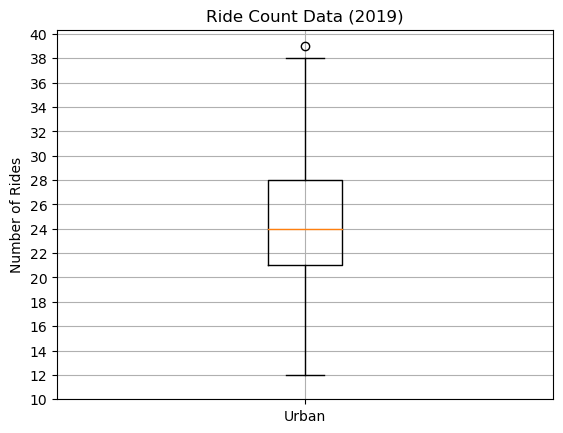

In [92]:
# 6. Create box and whisker plot for # of riders by city type
# Create a box-and-whisker plot for the urban cities ride count
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

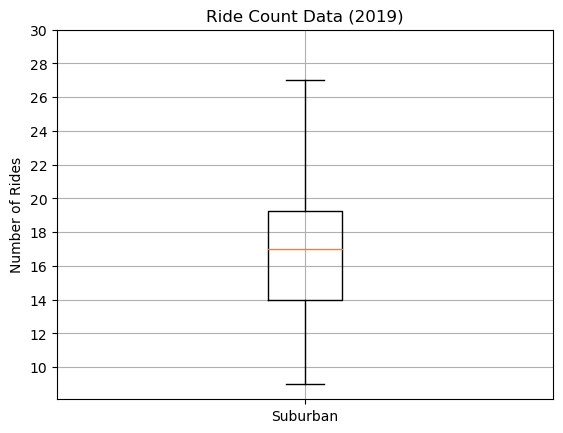

In [96]:
# Create a box-and-whisker plot for the suburban cities ride count
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 31, step=2.0))
ax.grid()
plt.show()

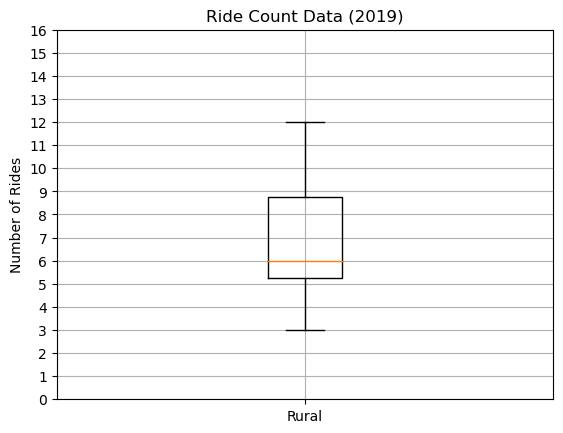

In [101]:
# Create a box-and-whisker plot for the rural cities ride count
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 17, step=1.0))
ax.grid()
plt.show()

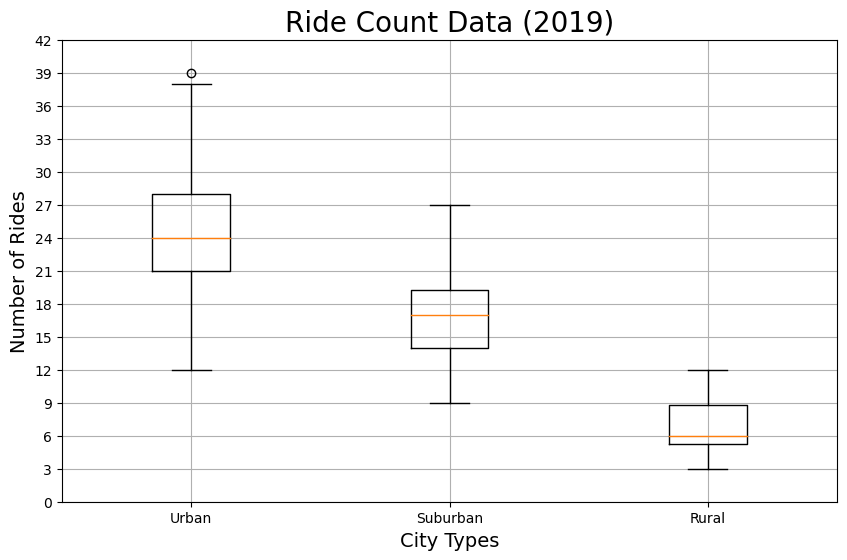

In [103]:
# Add all ride count box-and-whisker plots to the same graph
x_city_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_city_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the fig
plt.savefig('analysis/fig2.png')
plt.show()

In [104]:
# Get the city that matches the outlier ride count 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outlier} has the highest rider count')

West Angela has the highest rider count


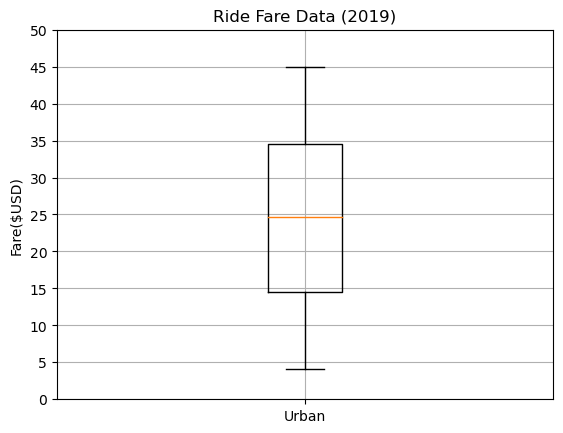

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [105]:
# 7. Create box and whisker for fares by city type
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

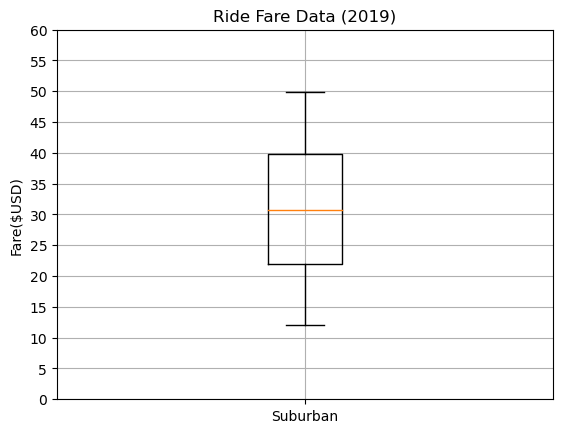

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [110]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

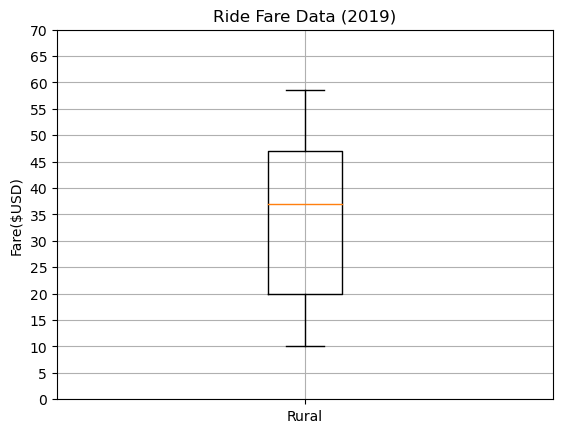

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [109]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 71, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

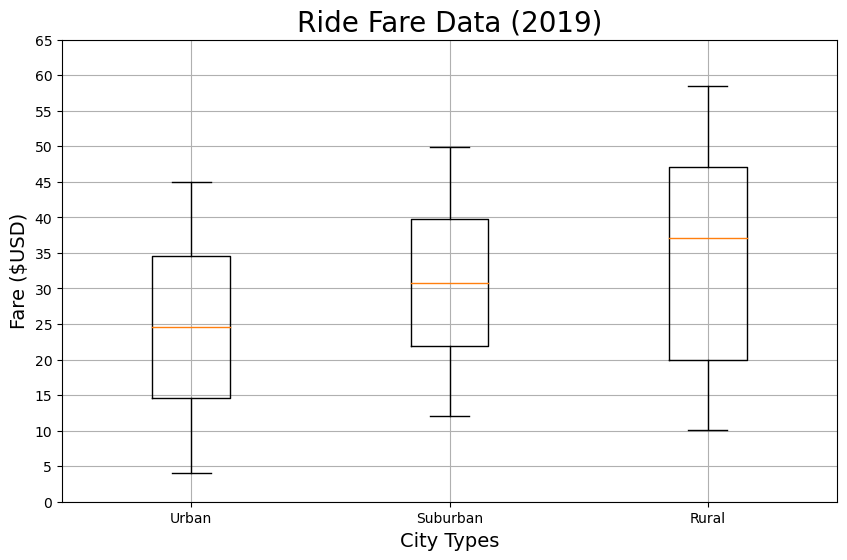

In [130]:
# Add all fare box-and-whisker plots to the same graph
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(fares_data, labels=x_city_labels)
ax.set_yticks(np.arange(0, 66, step=5.0))
ax.grid()
# Save the fig
plt.savefig('analysis/fig3.png')
plt.show()

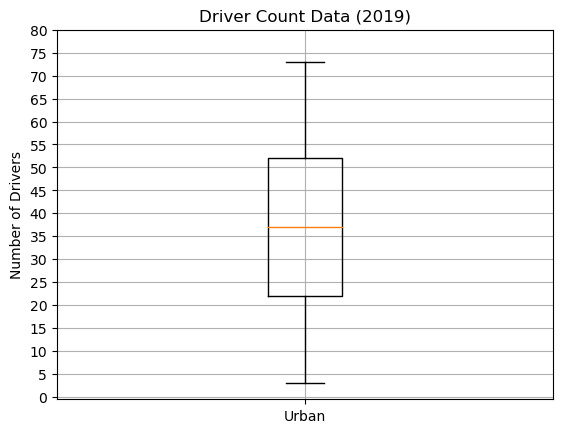

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [125]:
# 8. Create box and whisker for the number of drivers by city type
# Create a box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 81, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

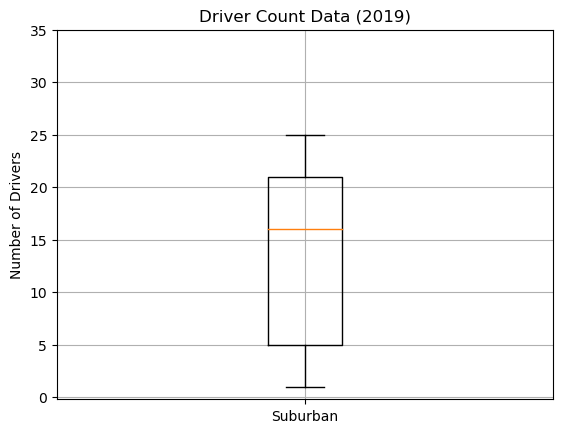

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [127]:
# Create a box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 36, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

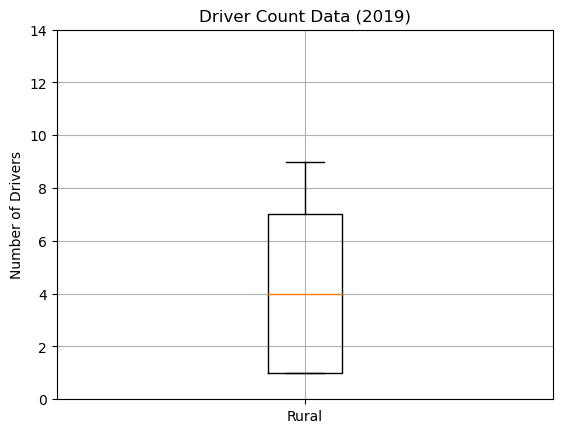

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [129]:
# Create a box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 15, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

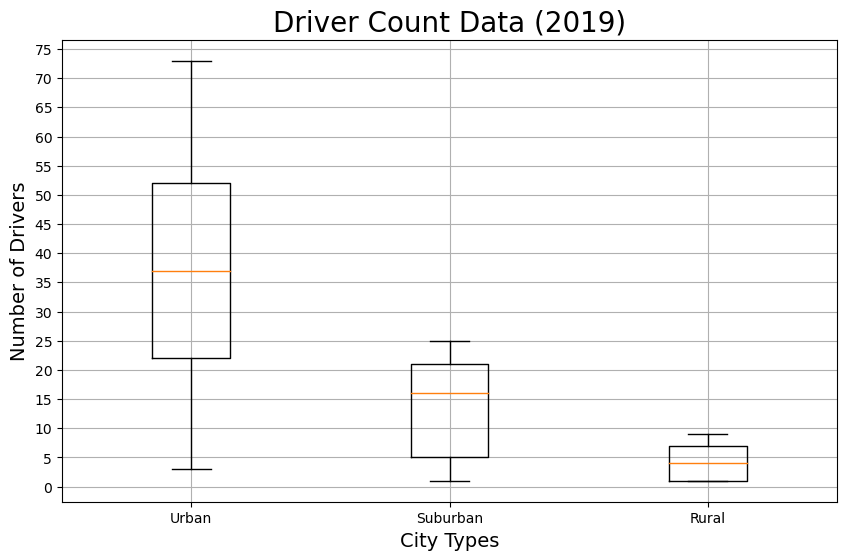

In [131]:
# Add all driver count box-and-whisker plots to the same graph
drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(drivers_data, labels=x_city_labels)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()
# Save the fig
plt.savefig('analysis/fig4.png')
plt.show()

In [132]:
# 9. Create pie chart for percent of total fares
# Get the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [133]:
# Sum of all the fares
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [134]:
# percent of fare by city type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

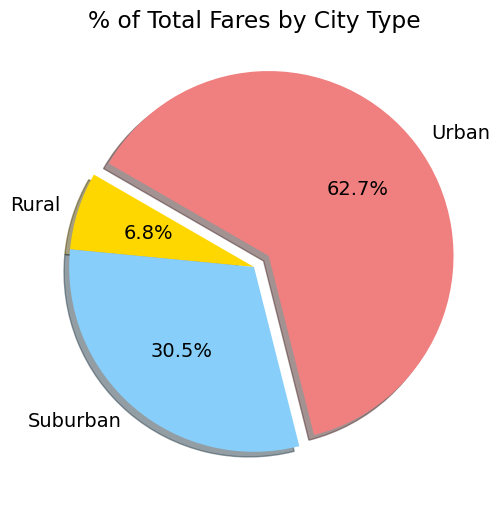

In [145]:
# Import mpl to change the plot configs using rcParams
import matplotlib as mpl
# Percent of fares by city type pie chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, 
    labels=['Rural', 'Suburban', 'Urban'],
    colors=['gold', 'lightskyblue', 'lightcoral'],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title('% of Total Fares by City Type')
# Change font size
mpl.rcParams['font.size'] = 14
plt.savefig('analysis/fig5.png')
plt.show

In [137]:
# 10. Create pie chart for percent of total rides
ride_percents = 100 * pyber_data_df.groupby(['type']).count()['ride_id'] / pyber_data_df['ride_id'].count()
ride_percents


type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

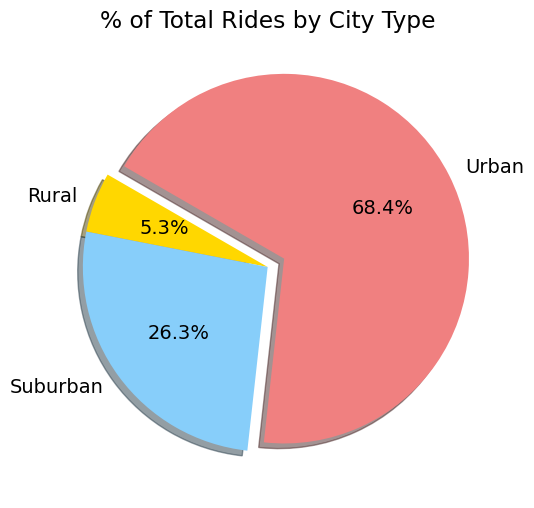

In [146]:
# Percent of rides by city type pie chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents, 
    labels=['Rural', 'Suburban', 'Urban'],
    colors=['gold', 'lightskyblue', 'lightcoral'],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title('% of Total Rides by City Type')
# Change font size
mpl.rcParams['font.size'] = 14
plt.savefig('analysis/fig6.png')
plt.show

In [149]:
# 11. Create pie chart for percent of total drivers
# Get driver percents by city type
driver_count_percents = 100 * city_data_df.groupby(['type']).sum()['driver_count'] / city_data_df['driver_count'].sum()
driver_count_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

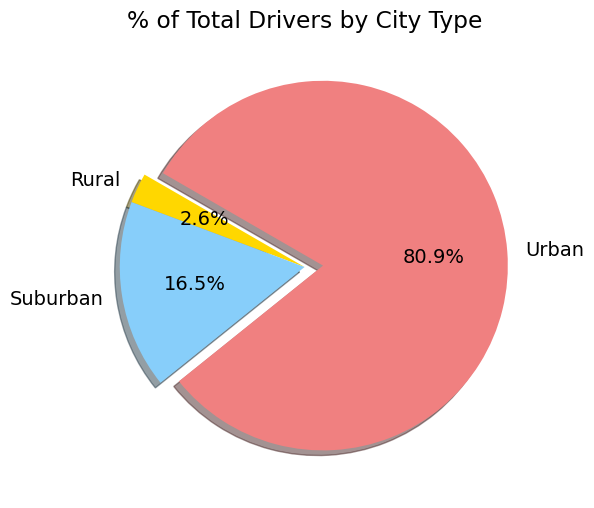

In [150]:
# Percent of drivers by city type pie chart
plt.subplots(figsize=(10, 6))
plt.pie(driver_count_percents, 
    labels=['Rural', 'Suburban', 'Urban'],
    colors=['gold', 'lightskyblue', 'lightcoral'],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title('% of Total Drivers by City Type')
# Change font size
mpl.rcParams['font.size'] = 14
plt.savefig('analysis/fig7.png')
plt.show